# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
cityw = requests.get(query_url)
citywj= cityw.json()
pprint.pprint(citywj, indent=4)

{   'base': 'stations',
    'clouds': {'all': 100},
    'cod': 200,
    'coord': {'lat': 18.3258, 'lon': 72.965},
    'dt': 1678862158,
    'id': 1262403,
    'main': {   'feels_like': 32.04,
                'grnd_level': 1007,
                'humidity': 46,
                'pressure': 1009,
                'sea_level': 1009,
                'temp': 31.11,
                'temp_max': 31.11,
                'temp_min': 31.11},
    'name': 'Murud',
    'sys': {'country': 'IN', 'sunrise': 1678843014, 'sunset': 1678886262},
    'timezone': 19800,
    'visibility': 10000,
    'weather': [   {   'description': 'overcast clouds',
                       'icon': '04d',
                       'id': 804,
                       'main': 'Clouds'}],
    'wind': {'deg': 266, 'gust': 2.45, 'speed': 3.7}}


In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weatherj= city_weather.json()
#pprint.pprint(city_weatherj, indent=4)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weatherj["coord"]["lat"]
        city_lng = city_weatherj["coord"]["lon"]
        city_max_temp = city_weatherj["main"]["temp_max"]
        city_humidity = city_weatherj["main"]["humidity"]
        city_clouds = city_weatherj["clouds"]["all"]
        city_wind = city_weatherj["wind"]["speed"]
        city_country = city_weatherj["sys"]["country"]
        city_date = city_weatherj["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | christchurch
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | harrisonburg
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | muswellbrook
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | esmeraldas
Processing Record 15 of Set 1 | wasilla
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | buraydah
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | marsh harbour
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of 

Processing Record 37 of Set 4 | golden
Processing Record 38 of Set 4 | padang
Processing Record 39 of Set 4 | naftah
City not found. Skipping...
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | nsanje
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | haines junction
Processing Record 47 of Set 4 | saint-francois
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 0 of Set 5 | ribas do rio pardo
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | kondinskoye
Processing Record 4 of Set 5 | san rafael
Processing Record 5 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 6 of Set 5 | loksa
Processing Record 7 of Set 5 | amderma
City not found. Ski

Processing Record 25 of Set 8 | vaasa
Processing Record 26 of Set 8 | baijiantan
Processing Record 27 of Set 8 | sholokhove
Processing Record 28 of Set 8 | zhicheng
Processing Record 29 of Set 8 | porto santo
Processing Record 30 of Set 8 | srednekolymsk
Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | bargal
City not found. Skipping...
Processing Record 33 of Set 8 | puerto escondido
Processing Record 34 of Set 8 | shiyan
Processing Record 35 of Set 8 | potosi
Processing Record 36 of Set 8 | darien
Processing Record 37 of Set 8 | chernyshevskiy
Processing Record 38 of Set 8 | balikpapan
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | barguzin
Processing Record 42 of Set 8 | naruto
Processing Record 43 of Set 8 | egvekinot
Processing Record 44 of Set 8 | vreed en hoop
City not found. Skipping...
Processing Record 45 of Set 8 | ulladulla
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set

Processing Record 14 of Set 12 | gat
Processing Record 15 of Set 12 | codajas
Processing Record 16 of Set 12 | chai badan
Processing Record 17 of Set 12 | sakakah
Processing Record 18 of Set 12 | srivardhan
Processing Record 19 of Set 12 | tautira
Processing Record 20 of Set 12 | pacific grove
Processing Record 21 of Set 12 | ipixuna
Processing Record 22 of Set 12 | kiriakion
City not found. Skipping...
Processing Record 23 of Set 12 | tsabong
Processing Record 24 of Set 12 | juegang
Processing Record 25 of Set 12 | deputatskiy
Processing Record 26 of Set 12 | vestmannaeyjar
Processing Record 27 of Set 12 | peniche
Processing Record 28 of Set 12 | grindavik
Processing Record 29 of Set 12 | panjab
Processing Record 30 of Set 12 | abatskoye
Processing Record 31 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 32 of Set 12 | duluth
Processing Record 33 of Set 12 | shache
Processing Record 34 of Set 12 | dabola
Processing Record 35 of Set 12 | omboue
Processing Record 36 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.67,79,21,6.74,KI,1678862000
1,ushuaia,-54.8000,-68.3000,2.81,75,0,3.60,AR,1678862004
2,kaitangata,-46.2817,169.8464,14.12,83,86,2.85,NZ,1678862120
3,ponta do sol,32.6667,-17.1000,16.35,79,75,0.81,PT,1678862025
4,bredasdorp,-34.5322,20.0403,20.91,90,100,8.15,ZA,1678862052


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.67,79,21,6.74,KI,1678862000
1,ushuaia,-54.8000,-68.3000,2.81,75,0,3.60,AR,1678862004
2,kaitangata,-46.2817,169.8464,14.12,83,86,2.85,NZ,1678862120
3,ponta do sol,32.6667,-17.1000,16.35,79,75,0.81,PT,1678862025
4,bredasdorp,-34.5322,20.0403,20.91,90,100,8.15,ZA,1678862052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

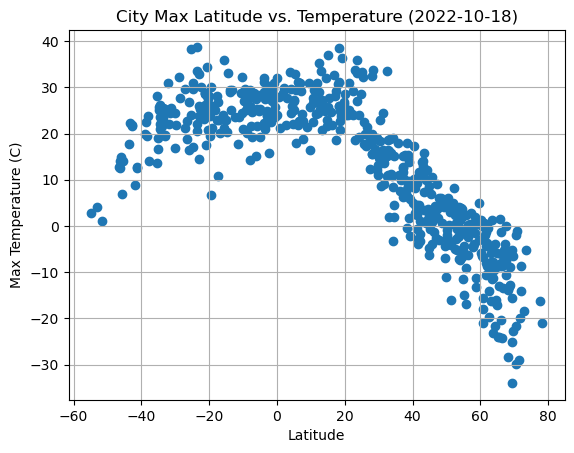

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

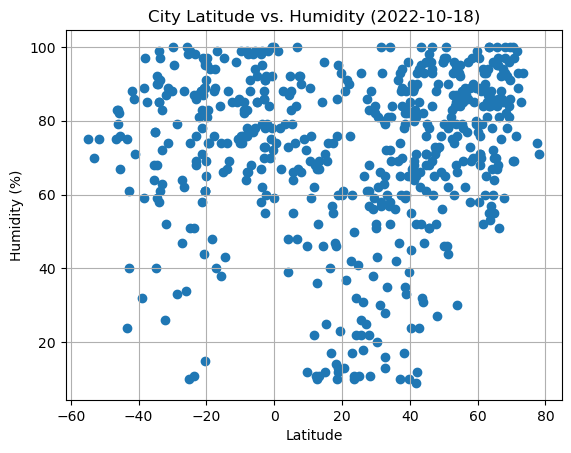

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

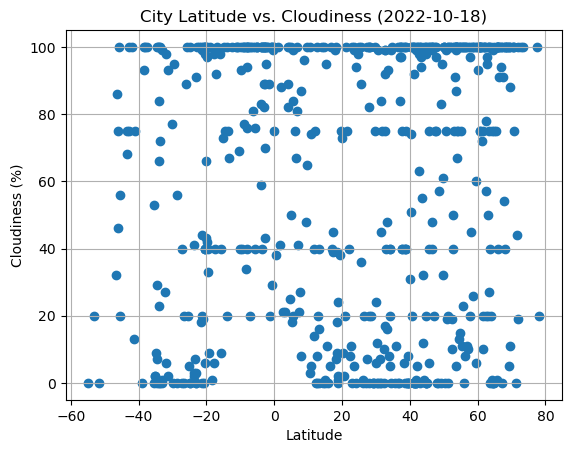

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

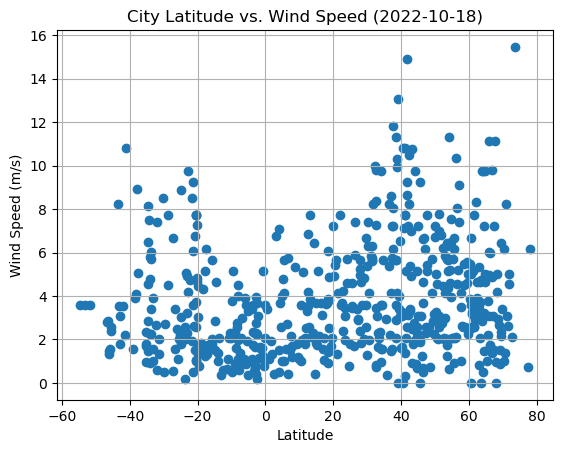

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def line_regression(x_values, y_values, coordinates, y_label):
    (slope,intercept,rvalue, pvalue, intercept_stderr) = linregress(x_values, y_values)

    regress_values= x_values*slope+intercept

    plt.scatter(x_values, y_values)
    line_anno = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_anno, coordinates, fontsize=15, color="red")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[(city_data_df["Lat"]>=0)]
northern_hemi_df = northern_hemi.reset_index().set_index(["City_ID"])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.67,79,21,6.74,KI,1678862000
3,ponta do sol,32.6667,-17.1000,16.35,79,75,0.81,PT,1678862025
6,harrisonburg,38.4496,-78.8689,-0.47,59,40,5.66,US,1678862162
8,cherskiy,68.7500,161.3000,-12.76,92,100,2.96,RU,1678862116
10,tuktoyaktuk,69.4541,-133.0374,-33.96,100,100,2.36,CA,1678861993


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"]<0)]
southern_hemi_df = southern_hemi.reset_index().set_index(["City_ID"])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,2.81,75,0,3.60,AR,1678862004
2,kaitangata,-46.2817,169.8464,14.12,83,86,2.85,NZ,1678862120
4,bredasdorp,-34.5322,20.0403,20.91,90,100,8.15,ZA,1678862052
5,christchurch,-43.5333,172.6333,17.73,75,75,8.23,NZ,1678862012
7,bluff,-46.6000,168.3333,12.67,75,32,2.81,NZ,1678862163


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8132824752823712


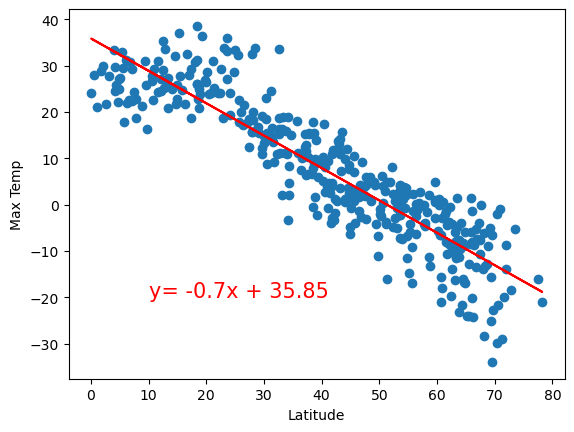

In [16]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
line_regression(x_values, y_values, (10, -20), "Max Temp")


The r-value is: 0.23926374212990895


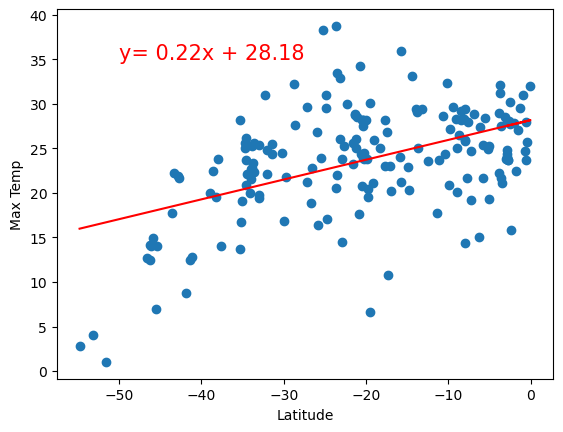

In [17]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
line_regression(x_values, y_values, (-50, 35), "Max Temp")

**Discussion about the linear relationship:** The relationship between Max Temperature and Latitude on the Northern Hemisphere is a strong negative relationship meaning that as the latitude increases, the temperature decreases significantly.

Meanwhile, the relationship between Max Temperature and Latitude on the Southern Hemisphere is a positive relationship meaning that as the latitude increases, the temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1332960302464161


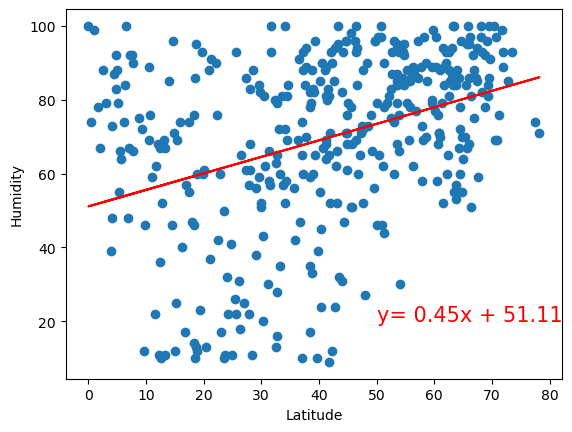

In [18]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
line_regression(x_values, y_values, (50, 20), "Humidity")

The r-value is: 0.030421522521937583


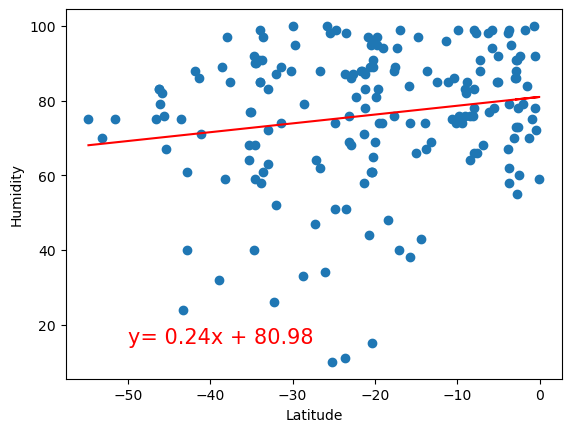

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
line_regression(x_values, y_values, (-50, 15), "Humidity")

**Discussion about the linear relationship:** Although it's more prominent in the Northern Hemisphere, the relationship between Humidity and Latitude in both the Northern and Southern Hemispheres show a slight positive relationship, meaning that as the latitude increases in either hemisphere, the humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.044610874030963005


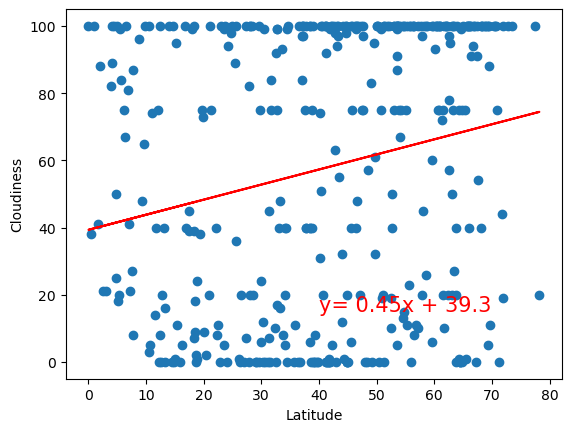

In [20]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
line_regression(x_values, y_values, (40, 15), "Cloudiness")

The r-value is: 0.13325564133649775


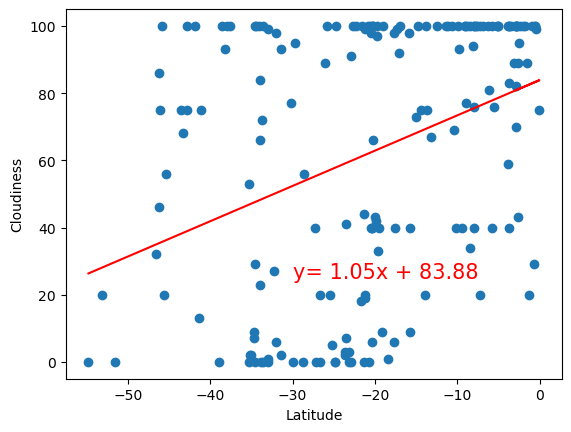

In [21]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
line_regression(x_values, y_values, (-30, 25), "Cloudiness")

**Discussion about the linear relationship:** Although it's more prominent in the Southern Hemisphere, the relationship between Cloudiness and Latitude in both the Northern and Southern Hemispheres show a positive relationship, meaning that as the latitude increases in either hemisphere, the cloudiness also increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01893373354597909


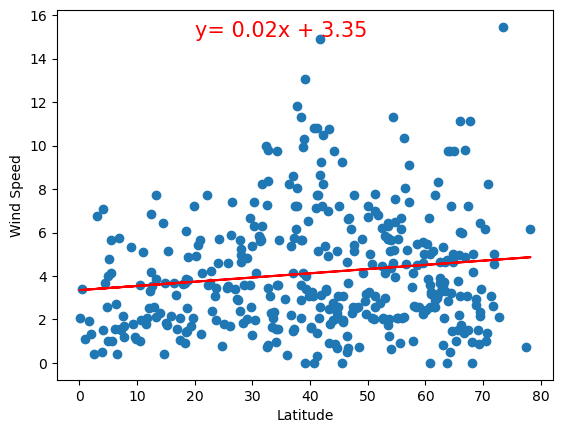

In [22]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
line_regression(x_values, y_values, (20, 15.0), "Wind Speed")

The r-value is: 0.07839622375005112


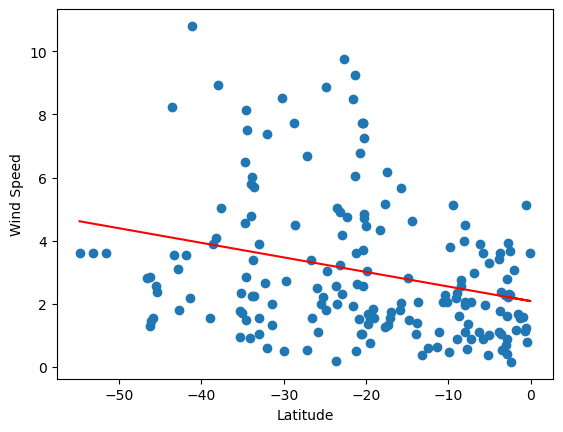

In [23]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
line_regression(x_values, y_values, (48, 12), "Wind Speed")

**Discussion about the linear relationship:** Windspeed and latitude in the Northern Hemisphere shows a very small positive relationship (almost no relationship, becasue it's almost a horizontal line), which means that as the latitude increases, the windspeed also SLIGHTLY increases (but not significantly).

Meanwhile, the relationship between Windspeed and Latitude in the Southern Hemisphere shows a slight negative relationship, which means that as the latitude increases, the wind speed slightly decreases.